<a href="https://colab.research.google.com/github/hibatallahk/DistFL/blob/main/FedAvg_Honest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import zscore                  

In [2]:
#Import all libraries
import matplotlib.pyplot as plt
import time
import os
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns   #visualization
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import glob
import psutil
import csv
from itertools import repeat
from PIL import Image

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, GaussianNoise
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, History
from tensorflow.keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path1_15 = "/content/drive/MyDrive/leak_pipe/Leak 1_15m.npy"
path2_15 = "/content/drive/MyDrive/leak_pipe/Leak 2_15m.npy"
path3_15 = "/content/drive/MyDrive/leak_pipe/Leak 3_15m.npy"
######################################################
path1_30 = "/content/drive/MyDrive/leak_pipe/Leak 1_30m.npy"
path2_30 = "/content/drive/MyDrive/leak_pipe/Leak 2_30m.npy"
path3_30 = "/content/drive/MyDrive/leak_pipe/Leak 3_30m.npy"
#######################################################
path1_50 = "/content/drive/MyDrive/leak_pipe/Leak 1_50m.npy"
path2_50 = "/content/drive/MyDrive/leak_pipe/Leak 2_50m.npy"
path3_50 = "/content/drive/MyDrive/leak_pipe/Leak 3_50m.npy"

array1_15 = np.load(path1_15)
array2_15 = np.load(path2_15)
array3_15 = np.load(path3_15)
########################
array1_30 = np.load(path1_30)
array2_30 = np.load(path2_30)
array3_30 = np.load(path3_30)
########################
array1_50 = np.load(path1_50)
array2_50 = np.load(path2_50)
array3_50 = np.load(path3_50)

data1_15 = pd.DataFrame(array1_15)
data2_15 = pd.DataFrame(array2_15)
data3_15 = pd.DataFrame(array3_15)
#################################
data1_30 = pd.DataFrame(array1_30)
data2_30 = pd.DataFrame(array2_30)
data3_30 = pd.DataFrame(array3_30)
#################################
data1_50 = pd.DataFrame(array1_50)
data2_50 = pd.DataFrame(array2_50)
data3_50 = pd.DataFrame(array3_50)

data1_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
######################################################
data1_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
#######################################################
data1_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)

data1_15['leak'] = 0.12
data1_30['leak'] = 0.31
data1_50['leak'] = 0.65
######################################################
data2_15['leak'] = 0.29
data2_30['leak'] = 0.39
data2_50['leak'] = 0.60
########################################################
data3_15['leak'] = 0.09
data3_30['leak'] = 0.37
data3_50['leak'] = 0.60

#frames = [data1_15, data1_30, data1_50]

frames = [data1_15, data1_30, data1_50, data2_15, data2_30, data2_50, data3_15, data3_30, data3_50]

df = pd.concat(frames, ignore_index=True)

#df['label'] = df['leak']

df.loc[df['leak'] == 0.09, 'label'] = 1
df.loc[df['leak'] == 0.12, 'label'] = 2
df.loc[df['leak'] == 0.29, 'label'] = 3
df.loc[df['leak'] == 0.31, 'label'] = 4
df.loc[df['leak'] == 0.37, 'label'] = 5
df.loc[df['leak'] == 0.39, 'label'] = 6
df.loc[df['leak'] == 0.60, 'label'] = 7
df.loc[df['leak'] == 0.65, 'label'] = 8

df = df.drop(['leak'], axis = 1)

In [6]:
df = df.sample(frac=1)
#df

In [7]:
df.head()

,P1,Q1,P2,Q2,label
759812,38.828752,0.511263,33.424914,0.139346,7.0
46098,39.989576,0.211164,40.451668,0.098528,2.0
427930,40.234692,0.221000,38.166025,0.128831,8.0
423963,39.811637,0.237143,38.584592,0.147145,8.0
1143778,36.179096,0.875066,24.381948,0.319510,5.0


In [8]:
# Standardize ranges
df['P1'] = zscore(df['P1'])
df['Q1'] = zscore(df['Q1'])
df['P2'] = zscore(df['P2'])
df['Q2'] = zscore(df['Q2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350000 entries, 759812 to 206134
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   P1      1350000 non-null  float64
 1   Q1      1350000 non-null  float64
 2   P2      1350000 non-null  float64
 3   Q2      1350000 non-null  float64
 4   label   1350000 non-null  float64
dtypes: float64(5)
memory usage: 61.8 MB


In [10]:
df

,P1,Q1,P2,Q2,label
759812,0.289691,-0.332206,0.042939,-0.536879,7.0
46098,1.267513,-1.540337,1.342920,-0.810279,2.0
427930,1.473987,-1.500737,0.920066,-0.607310,8.0
423963,1.117626,-1.435751,0.997502,-0.484646,8.0
1143778,-1.942251,1.132382,-1.630049,0.669844,5.0
...,...,...,...,...,...
1334851,-0.585134,0.384481,-0.968450,-0.578511,7.0
668577,-0.972308,1.058076,-0.971983,1.610719,6.0
147726,1.211114,-1.510840,1.372151,-0.722087,2.0
139136,1.286313,-1.541461,1.348530,-0.803926,2.0


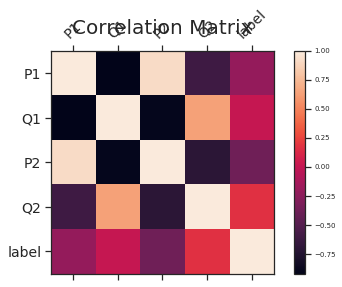

In [14]:
f = plt.figure(figsize=(7, 4))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix', fontsize=20);

In [15]:
# Convert to numpy - Classification
x_columns = df.columns.drop('label')
x = df[x_columns].values
dummies = pd.get_dummies(df['label']) # Classification
products = dummies.columns
y = dummies.values  

In [51]:
Y_full = y
X_full = x

In [52]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    X_full, Y_full, test_size=0.80, random_state=42)

In [53]:
x_train.shape

(270000, 4)

In [54]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumulative explained variance')

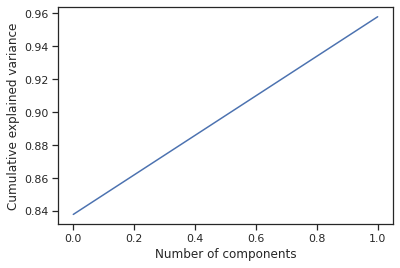

In [55]:
pca = PCA(n_components=2)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(x_train)
X_sc_train = scaler.transform(x_train)
X_sc_test = scaler.transform(x_test)

In [58]:
NCOMPONENTS = 2

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(270000, 4)
(270000, 2)


In [59]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [60]:
X_sc_train.shape

(270000, 4)

In [61]:
X_pca_train.shape

(270000, 2)

In [62]:
def createDeepModel(input_shape):
  model = Sequential()
  layers = 3
  units = 369

  model.add(Dense(units, input_dim=input_shape, activation='relu'))
  model.add(GaussianNoise(pca_std))
  for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [63]:
deepModel=createDeepModel(2)

In [64]:
tf.keras.callbacks.History()

deepModel.fit(X_pca_train, y_train, epochs=30, batch_size=1000, validation_split=0.15, verbose=2)

Epoch 1/30
230/230 - 2s - loss: 1.6323 - accuracy: 0.4206 - val_loss: 1.4271 - val_accuracy: 0.3077 - 2s/epoch - 9ms/step
Epoch 2/30
230/230 - 1s - loss: 0.6555 - accuracy: 0.6902 - val_loss: 1.0053 - val_accuracy: 0.5189 - 1s/epoch - 4ms/step
Epoch 3/30
230/230 - 1s - loss: 0.4741 - accuracy: 0.7871 - val_loss: 0.8911 - val_accuracy: 0.5830 - 931ms/epoch - 4ms/step
Epoch 4/30
230/230 - 1s - loss: 0.3740 - accuracy: 0.8386 - val_loss: 0.6204 - val_accuracy: 0.7253 - 972ms/epoch - 4ms/step
Epoch 5/30
230/230 - 1s - loss: 0.3111 - accuracy: 0.8690 - val_loss: 0.6405 - val_accuracy: 0.7141 - 960ms/epoch - 4ms/step
Epoch 6/30
230/230 - 1s - loss: 0.2678 - accuracy: 0.8905 - val_loss: 0.5592 - val_accuracy: 0.7774 - 995ms/epoch - 4ms/step
Epoch 7/30
230/230 - 1s - loss: 0.2331 - accuracy: 0.9068 - val_loss: 0.5831 - val_accuracy: 0.7432 - 939ms/epoch - 4ms/step
Epoch 8/30
230/230 - 1s - loss: 0.2096 - accuracy: 0.9161 - val_loss: 0.6529 - val_accuracy: 0.7447 - 943ms/epoch - 4ms/step
Epoch 

In [65]:
xTrain=X_pca_train
yTrain=y_train

#Federated Data

In [66]:
xServer, xClients, yServer, yClients = train_test_split(xTrain, yTrain, test_size=0.80,random_state=523) 

In [67]:
xServer.shape

(54000, 2)

In [68]:
xClients.shape

(216000, 2)

#FL model

In [69]:
algoName='CNN' #CNN, ANN, DNN

In [70]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    #print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, recall, f1Score

In [71]:
verbose, epochs, batch_size = 0, 30, 64
activationFun='relu'
optimizerName='Adam'

In [72]:
num_classes = len(np.unique(yTrain))

In [73]:
def predictTestData(yPredict, yTest):
    #Converting predictions to label
    print("yPredict",len(yPredict))
    pred = list()
    for i in range(len(yPredict)):
        pred.append(np.argmax(yPredict[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(yTest)):
        test.append(np.argmax(yTest[i]))
    return my_metrics(test, pred)

In [74]:
def sumOfWeights(weights):
    return sum(map(sum, weights))

In [75]:
def getWeights(model):
    allLayersWeights=deepModel.get_weights()
    return allLayersWeights

In [76]:
def euclidian_distance(x1,x2):
    return np.linalg.norm(x1-x2)

In [77]:
def make_distance_matrix(w_server, w_client, w=60, distance = euclidian_distance):
    """ This function returns the distance matrix between weight of server and client according to a 
    similarity measure. 
    """    
    #dist_m=distance.euclidean(w_server, w_client)

    # Distance matrix calculation
    n = w_client.shape[0]
    #m = w_server.shape[0]  
    dist_m = np.zeros(n,)
    client_spl = list(enumerate(w_client))
    for row, server_spl in enumerate(w_server):
        if distance == euclidian_distance:
            dist_row_col = euclidian_distance(server_spl, client_spl[row][1])
            dist_m[row,] = dist_row_col
    return dist_m

In [78]:
xTrain.shape[1:]

(2,)

In [92]:
# Initially train central deep model
deepModel=createDeepModel(input_shape=4)

In [93]:
deepModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 369)               1845      
                                                                 
 gaussian_noise_16 (Gaussian  (None, 369)              0         
 Noise)                                                          
                                                                 
 dense_21 (Dense)            (None, 369)               136530    
                                                                 
 gaussian_noise_17 (Gaussian  (None, 369)              0         
 Noise)                                                          
                                                                 
 dropout_12 (Dropout)        (None, 369)               0         
                                                                 
 dense_22 (Dense)            (None, 369)              

In [94]:
numOfIterations=3 #6 #The model with those same parameters converged at iteration 49 and diverged at it 50
numOfClients=4 #15 # 10, 15, 20, 25, 30, 35, 40, 45, 50
modelLocation="Models/"+str(algoName)+"_Sync_users_"+str(numOfClients)+"_"+activationFun+"_"+optimizerName+"_FL_Model.h5"
accList, precList, recallList, f1List = [], [], [], []
#The model with those same parameters converged at iteration 49 and diverged at it 50

In [95]:
deepModelAggWeights=[]
firstClientFlag=True

In [96]:
def updateServerModel(clientModel, clientModelWeight):
    global firstClientFlag
    for ind in range(len(clientModelWeight)):
        if(firstClientFlag==True):
            deepModelAggWeights.append(clientModelWeight[ind])            
        else:
            deepModelAggWeights[ind]=(deepModelAggWeights[ind]+clientModelWeight[ind])

In [97]:
def updateClientsModels():
    global clientsModelList
    global deepModel
    clientsModelList.clear()
    for clientID in range(numOfClients):
        m = keras.models.clone_model(deepModel)
        m.set_weights(deepModel.get_weights())
        clientsModelList.append(m)

In [98]:
# ----- 1. Train central model initially -----
def trainInServer():
    #deepModel.fit(xServer, yServer, epochs=epochs, batch_size=batch_size, verbose=verbose)
    deepModel.fit(X_full, Y_full, epochs=epochs, batch_size=batch_size, verbose=verbose)
    deepModel.save(modelLocation)

In [99]:
deepModel.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)